<a href="https://colab.research.google.com/github/mrmendapara/Python-ML/blob/master/Image_Prediction_CIFAR_Manthan_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 3s 0us/step


In [0]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output

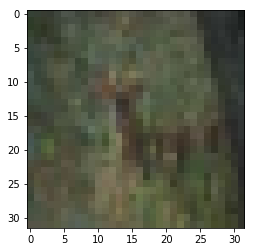

In [0]:
plt.imshow(x_train[10])

In [0]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [0]:
for i in range(0,len(y_train)):
  
  if(y_train[i][0]==0):
    y_train[i][0]=random.randint(0,10)
    
  if(y_train[i][0]==1):
    y_train[i][0]=random.randint(10,20)
    
  if(y_train[i][0]==2):
    y_train[i][0]=random.randint(20,30)
    
  if(y_train[i][0]==3):
    y_train[i][0]=random.randint(30,40)
    
  if(y_train[i][0]==4):
    y_train[i][0]=random.randint(40,50)
    
  if(y_train[i][0]==5):
    y_train[i][0]=random.randint(50,60)
    
  if(y_train[i][0]==6):
    y_train[i][0]=random.randint(60,70)
    
  if(y_train[i][0]==7):
    y_train[i][0]=random.randint(70,80)
    
  if(y_train[i][0]==8):
    y_train[i][0]=random.randint(80,90)
    
  if(y_train[i][0]==9):
    y_train[i][0]=random.randint(90,100)  

In [0]:
x_train_flat = []
for i in range(0,len(x_train)):
  x_train_flat.append(np.ndarray.flatten(x_train[i]))
 

In [0]:
print(np.array(x_train_flat).shape)

(50000, 3072)


In [0]:
x_train_flat = np.array(x_train_flat)
len(x_train_flat.T)

3072

In [0]:
def line_multidim(m,x,c):
  return np.dot(m,x.T) + c

def error(m,x,c,y):
  return np.mean((line_multidim(m,x,c)-y)**2)

def derivative_slopes(m,x,c,y):
  return 2*np.mean(np.multiply((line_multidim(m,x,c)-y),x.T),axis = 1)

def derivative_intercept(m,x,c,y):
  return 2*np.mean((line_multidim(m,x,c)-y))

def accuracy_pred(error,y):
  return 100 - (error/np.mean(y**2))*100

In [0]:
y_train = np.ndarray.flatten(y_train)
print(y_train[1:10])

[93 92 40 18 13 23 80 90 34]


Current Error:  110489078.07861103 Current Iteration: 99
Current Accuracy: -97111965.8143964


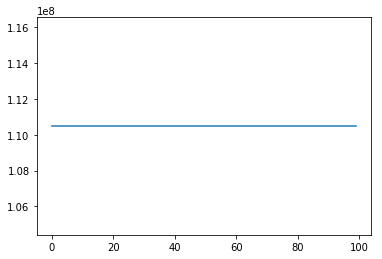

In [0]:
m = np.random.randn(1,len(x_train_flat.T))
c = random.random()

it = 100
lr = 0.000000000000000000000000000001
error_array = []

for i in range(0,it):
  m = m - lr*derivative_slopes(m,x_train_flat,c,y_train)
  c = c - lr*derivative_intercept(m,x_train_flat,c,y_train)
  error_array.append(error(m,x_train_flat,c,y_train))
  clear_output(True)
  print("Current Error: ",error(m,x_train_flat,c,y_train),"Current Iteration:",i)
  print("Current Accuracy:",accuracy_pred(error(m,x_train_flat,c,y_train),y_train))
  
plt.plot(error_array)
plt.show()